# 밑바닥부터 시작하는 딥러닝

# Deep Learning from Scratch

이번 장의 주제는 **합성곱 신경망(Convolutional Neural Network, CNN)**이다. CNN은 이미지 인식과 음성 인식 등 다양한 곳에서 사용되는데, 특히 이미지 인식 분야에서 딥러닝을 활용한 기법은 거의 다 CNN을 기초로 한다.

# 7.1 전체 구조
CNN : **합성곱 계층**과 **풀링 계층**이 새롭게 등장

지금까지 본 신경망은 인접하는 계층의 모든 뉴런과 결합
이를 **완전연결**이라고 하며, 완전히 연결된 계층을 **Affine 계층**이라고 한다.

affine 계층은  y = np.dot(x, W) + b 의 식으로 표현된다

층이 5개인 완전연결 신경망

![](./img/01.png)
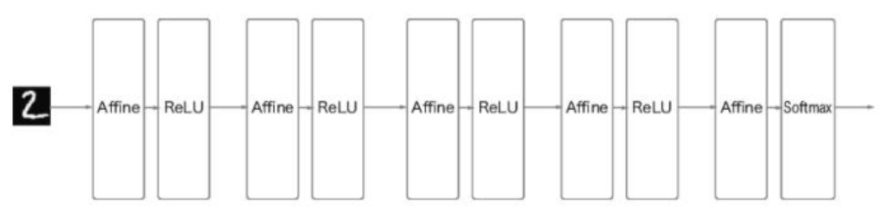

완전연결 신경망은 Affine 계층 뒤에 활성화 함수를 갖는 ReLU 계층 (혹은 Sigmoid 계층)이 이어짐


CNN의 구조


![](./img/02.png)
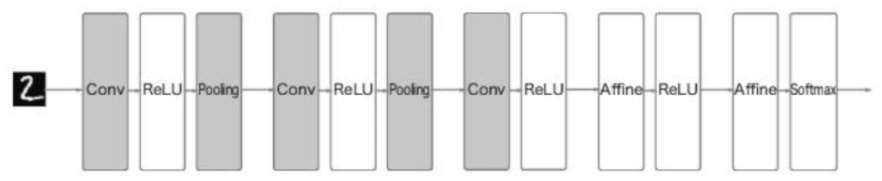

CNN에서는 새로운 '합성곱 계층(Conv)'과 '풀링 계층(Pooling)'이 추가.

CNN의 계층은 'Conv-ReLU-(Pooling)' 흐름으로 연결 (풀링 계층은 생략하기도 한다.)

출력에 가까운 층에서는 지금까지의 'Affine-ReLU' 구성을 사용할 수 있음

마지막 출력 계층에서는 'Affine-Softmax' 조합을 그대로 사용

이상은 일반적인 CNN에서 흔히 볼 수 있는 구성

# 7.2 합성곱 계층
CNN에서는 **패딩, 스트라이드** 등 CNN 고유의 용어가 등장

각 계층 사이에는 3차원 데이터같이 입체적인 데이터가 흐른다는 점에서 완전연결 신경망과 다름

## 7.2.1 완전연결 계층의 문제점
완전연결 계층에서는 인접하는 계층의 뉴런이 모두 연결되고 출력의 수는 임의로 정할 수 있다.

완전연결 계층의 문제점은 '데이터의 형상 무시'

입력 데이터가 이미지인 경우를 예로 들면, 이미지는 통상 세로, 가로, 채널(색상)로 구성된 3차원 데이터

그러나 완전연결 계층에 입력할 때는 3차원 데이터를 평평한 1차원 데이터로 평탄화해줘야 함

이미지는 3차원 형상이며, 이 형상에는 공간적 정보가 담겨 있음.  완전연결 계층은 형상을 무시하고 모든 입력 데이터를 동등한 뉴런(같은 차원의 뉴런)으로 취급하여 형상에 담긴 정보를 살릴 수 없음

한편, 합성곱 계층은 형상을 유지. 이미지도 3차원 데이터로 입력받으며, 마찬가지로 다음 계층에도 3차원 데이터로 전달한다. 그래서 CNN에서는 이미지처럼 형상을 가진 데이터를 제대로 이해할 가능성이 있음

CNN에서는 합성곱 계층의 입출력 데이터를 **'특징 맵'** 이라고도 한다. 합성곱 계층의 입력 데이터를 **입력 특징 맵**, 출력 데이터를 **출력 특징 맵**이라고 하는 식이다. 

## 7.2.2 합성곱 연산
합성곱 계층에서의 **합성곱 연산**을 처리. 합성곱 연산은 이미지 처리에서 말하는 **필터 연산**에 해당

![](./img/03.png)

합성곱 연산은 입력 데이터에 필터를 적용.

입력 데이터는 세로, 가로 방향의 형상을 가졌고, 필터 역시 세로, 가로 방향의 차원을 갖는다.

데이터와 필터의 형상을 (높이, 너비)로 표기하며, 이 예에서는 입력은 (4, 4), 필터는 (3, 3), 출력은 (2, 2)가 된다. 문헌에 따라 필터를 **커널**이라 칭하기도 한다.
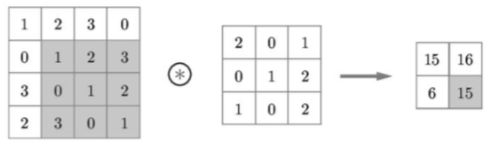

![](./img/04.png)

![](./img/29.png)
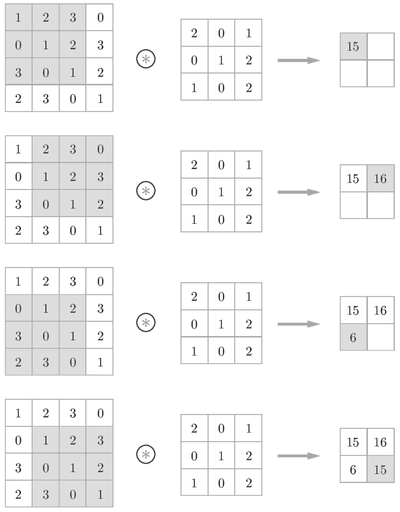

합성곱 연산은 필터의 **윈도우**를 일정 간격으로 이동해가며 입력 데이터에 적용한다.

입력과 필터에서 대응하는 원소끼리 곱한 후 그 총합을 구한다. (이 계산을 **단일 곱셈-누산**이라 한다.)

결과를 출력의 해당 장소에 저장한다. 이 과정을 모든 장소에서 수행하면 합성곱 연산의 출력이 완성

![](./img/05.png)

CNN에서는 필터의 매개변수가 그동안의 '가중치'에 해당하며, CNN에도 편향이 존재함

편향은 항상 하나만 존재하며 그 하나의 값을 필터를 적용한 모든 원소에 더하는 것
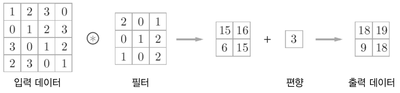

## 7.2.3 패딩
합성곱 연산을 수행하기 전에 입력 데이터 주변을 특정 값(예컨대 0)으로 채우는 것을 **패딩**이라 하며, 합성곱 연산에서 자주 이용하는 기법

![](./img/06.png)
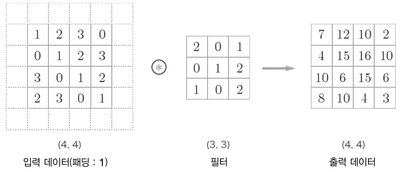

예를 들어 위의 그림은 (4, 4)크기의 입력 데이터에 폭이 1인 패딩을 적용

폭 1짜리 패딩이라 하면 입력 데이터 사방 1픽셀을 특정 값으로 채우는 것

처음에 크기가 (4, 4)인 입력 데이터에 패딩이 추가되어 (6, 6)

이 입력에 (3, 3) 크기의 필터를 걸면 (4, 4) 크기의 출력 데이터가 생성

이 예에서는 패딩을 1로 설정했지만, 2나 3 등 원하는 정수로 설정 가능

패딩은 주로 출력 크기를 조정할 목적으로 사용

예를 들어 (4, 4) 입력 데이터에 (3, 3) 필터를 적용하면 출력은 (2, 2)가 되어, 입력보다 2만큼 줄어듬

이는 합성곱 연산을 몇 번이나 되풀이하는 심층 신경망에서는 문제가 될 수 있음

합성곱 연산을 거칠 때마다 크기가 작아지면 어느 시점에서는 출력 크기가 1이 되어버리는 사태를 막기 위해 패딩을 사용

앞에 예에서는 패딩의 폭을 1로 설정하니 (4, 4) 입력에 대한 출력이 같은 크기인 (4, 4)로 유지됨

한 마디로 입력 데이터의 공간적 크기를 고정한 채로 다음 계층에 전달할 수 있음

## 7.2.4 스트라이드
필터를 적용하는 위치의 간격을 **스트라이드**라고하며

지금까지 본 예는 모두 스트라이드가 1이었지만, 예를 들어 스트라이드를 2로 하면 필터를 적용하는 윈도우가 두 칸씩 이동

![](./img/07.png)
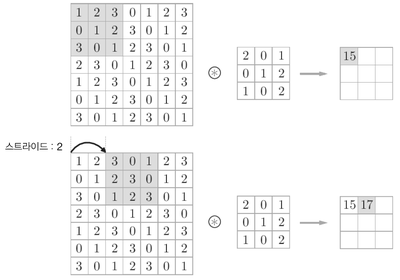

그림에서는 크기가 (7, 7)인 입력 데이터에 스트라이드를 2로 설정한 필터를 적용

이처럼 스트라이드는 필터를 적용하는 간격을 지정

스트라이드를 2로 하니 출력은 (3, 3)

이처럼 스트라이드를 키우면 출력 크기는 작아지고 패딩을 크게 하면 출력 크기가 커짐.

이러한 관계를 수식화하면 다음과 같음

입력 크기를 (H, W), 필터 크기를 (FH, FW), 출력 크기를 (OH, OW), 패딩을 P, 스트라이드를 S라 하면, 출력 크기는 다음 식으로 계산
$$ OH = \frac{H + 2P -FH}{S} + 1 $$  
$$ OW = \frac{W + 2P - FW}{S} + 1 $$

**예 1 : 입력 : (4, 4), 패딩 : 1, 스트라이드 : 1, 필터 (3, 3)**
$$ OH = \frac {4 + 2 * 1  - 3}{1} + 1 = 4 $$  
$$ OW = \frac {4 + 2 * 1 - 3}{1} + 1 = 4 $$

**예 2 : 입력(28, 31), 패딩 : 2, 스트라이드 : 3, 필터 : (5, 5)**
$$ OH = \frac {28 + 2 * 2 - 5}{3} + 1 = 10 $$  
$$ OW = \frac {31 + 2 * 2 - 5}{3} + 1 = 11 $$

---

단순히 값을 대입하기만 하면 출력 크기를 구할 수 있음.

단, 식의 $ \frac{H + 2P -FH}{S}$ 와 $\frac{W + 2P - FW}{S}$가 정수로 나눠떨어지는 값이어야 한다는 점에 주의

출력 크기가 정수가 아니면 오류를 내는 등의 대응 필요

덧붙여서 딥러닝 프레임워크 중에는 값이 딱 나눠떨어지지 않을 때는 가장 가까운 정수로 반올림하는 등, 특별히 에러를 내지 않고 진행하도록 구현하는 경우도 있음

## 7.2.5 3차원 데이터의 합성곱 연산
![](./img/08.png)
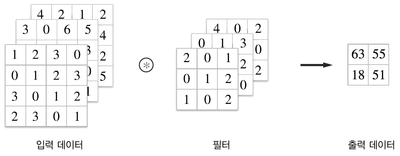

위 그림은 3차원 데이터의 합성곱 연산 예이다. 그리고 다음 그림은 계산 순서이다.

![](./img/09.png)
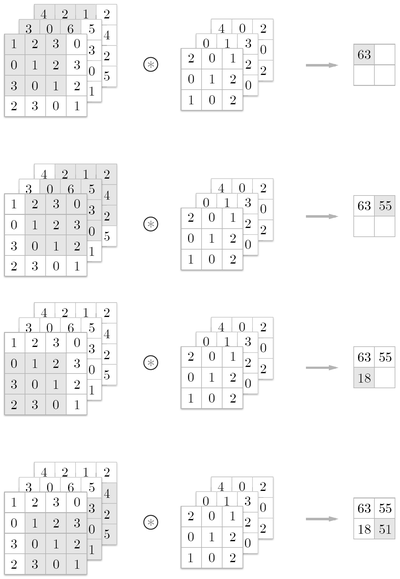

2차원일 때와 비교하면, 길이 방향(채널 방향)으로 특징 맵이 늘어남

채널 쪽으로 특징 맵이 여러 개 있다면 입력 데이터와 필터의 합성곱 연산을 채널마다 수행하고, 그 결과를 더해서 하나의 출력을 얻음

3차원의 합성곱 연산에서 주의할 점은 입력 데이터의 채널 수와 필터의 채널 수가 같아야 함.

필터 자체의 크기는 원하는 값으로 설정할 수 있으나 모든 채널의 필터가 같은 크기여야 함.

위 예에서는 필터의 크기가 (3, 3)이지만, (2, 2)나 (1, 1) 또는 (5, 5)등으로 설정해도 됨.

**필터의 채널 수는 입력 데이터의 채널 수와 같도록 설정해야 한다.**

## 7.2.6 블록으로 생각하기
3차원의 합성곱 연산은 데이터와 필터를 직육면체 블록이라고 생각하면 쉬움. 블록은 다음 그림과 같은 3차원 직육면체

![](./img/10.png)
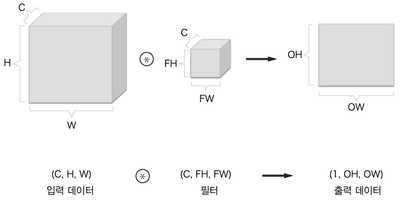

3차원 데이터를 다차원 배열로 나타낼 때는 (채널, 높이, 너비) 순서로 씀

채널 수 C, 높이 H, 너비 W인 데이터의 형상은 (C, H, W)

필터도 같은 순서로 쓰는데 채널 수 C, 필터 높이 FH, 필터 너비 FW의 경우 (C, FH, FW)로 씀

이 예에서 출력 데이터는 한 장의 특징 맵

한 장의 특징 맵을 다른 말로 하면 채널이 1개인 특징 맵

합성곱 연산의 출력으로 다수의 채널을 내보내려면 필터(가중치)를 다수 사용하는 것

![](./img/11.png)
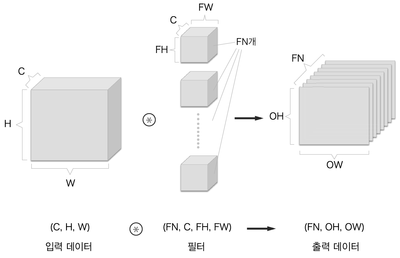

필터를 FN개 적용하면 출력 맵도 FN개가 생성

FN개의 맵을 모으면 (FN, OH, OW)인 블록이 완성

이 완성된 블록을 다음 계층으로 넘기겠다는 것이 CNN의 처리 흐름

이상에서 보든 합성곱 연산에서는 필터의 수도 고려해야 하며 필터의 가중치 데이터는 4차원 데이터이며 (출력 채널 수, 입력 채널 수, 높이, 너비)순으로 씀

예를 들어 채널 수 3, 크기 5 * 5인 필터가 20개 있다면 (20, 3, 5, 5)

합성곱 연산에도 완전연결 계층과 마찬가지로 편향이 쓰이며 다음 그림은 위의 그림에 편향을 더한 모습

![](./img/12.png)
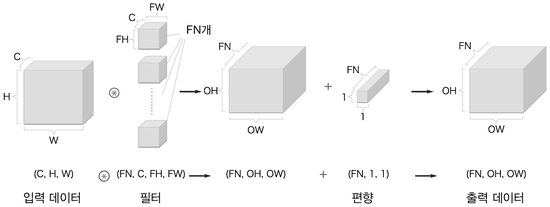

편향은 채널 하나에 값 하나씩으로 구성

이 예에서는 편향의 형상은 (FN, 1, 1)이고, 필터의 출력 결과의 형상은 (FN, OH, OW)

이 두 블록을 더하면 편향의 각 값이 필터의 출력인 (FN, OH, OW) 블록의 대응 채널의 원소 모두에 더해짐

형상이 다른 블록의 덧셈은 넘파이의 브로드캐스트 기능으로 쉽게 구현 가능

## 7.2.7 배치 처리
신경망 처리에서는 입력 데이터를 한 덩어리로 묶어 배치로 처리

완전연결 신경망을 구현하면서는 이 방식을 지원하여 처리 효율을 높이고, 미니배치 방식의 학습도 지원

합성곱 연산도 마찬가지로 배치 처리를 지원

각 계층을 흐르는 데이터의 차원을 하나 늘려 4차원 데이터로 저장

구체적으로는 데이터를 (데이터 수, 채널 수, 높이, 너비)순으로 저장

데이터가 N개일 때 위의 그림을 배치 처리 한다면 데이터 형태가 다음 그림처럼 되는 것이다.

![](./img/13.png)
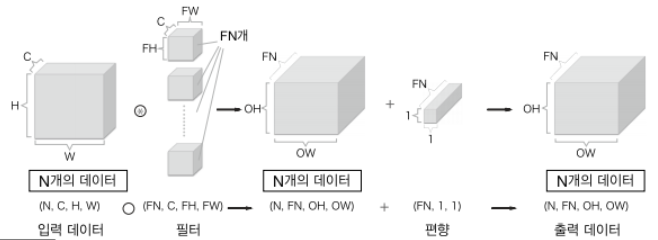

배치 처리 시의 데이터 흐름을 나타낸 그림을 보면 각 데이터의 선두에 배치용 차원을 추가.

이처럼 데이터는 4차원 형상을 가진 채 각 계층을 타고 흐르며 주의할 점으로는 신경망에 4차원 데이터가 하나 흐를 때마다 데이터 N개에 대한 합성곱 연산이 이루어 짐

즉, N회 분의 처리를 한 번에 수행하는 것이다.

입력 데이터 수가 10일 때 그것을 하나씩 처리하는 것보다 입력 데이터 10개를 한꺼번에 처리하는 것이 처리 속도와 메모리 사용 면에서 효율적입니다. 딥러닝에서는 대부분의 경우 데이터가 많아서 배치 처리를 사용하게 됩니다. 그리고 배치 처리를 하면 처리한 배치에 대한 그라디언트를 구할 수 있기 때문에, 정확한 학습이 가능합니다.

# 7.3 풀링 계층
풀링은 세로, 가로 방향의 공간을 줄이는 연산

그림과 같이 2 X 2 영역을 원소 하나로 집약하여 공간 크기를 줄임

![풀링](./img/14.png)

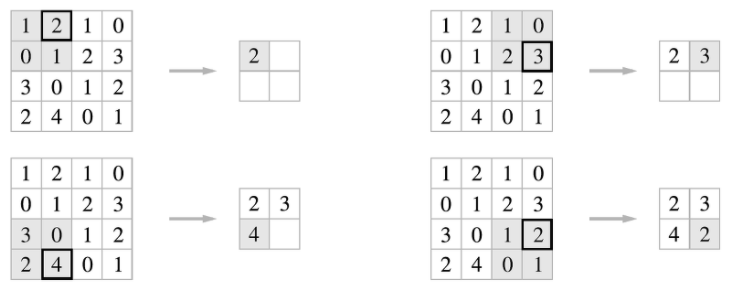

위 그림은 2 X 2 **최대 풀링(Max Pooling)** 을 스트라이드 2로 처리하는 순서

최대 풀링은 최댓값을 구하는 연산으로, '2 X 2'는 대상 영역의 크기를 뜻함

2 X 2 최대 풀링은 그림과 같이 2 X 2 크기의 영역에서 가장 큰 원소 하나를 꺼냄

스트라이드는 이 예에서는 2로 설정했으므로 2 X 2 윈도우가 원소 2칸 간격으로 이동

참고로, 풀링의 윈도우 크기와 스트라이드는 같은 값으로 설정하는 것이 보통

예를 들어 윈도우가 3 X 3이면 스트라이드는 3으로, 윈도우가 4 X 4이면 스트라이드를 4로 설정

> **평균 풀링 (average pooling)**
> 최대 풀링은 대상 영역에서 최댓값을 취하는 연산인 반면, 평균 풀링은 대상 영역의 평균을 계산.
> 이미지 인식 분야에서는 주로 최대 풀링을 사용


![풀링](./img/30.png)

## 7.3.1 풀링 계층의 특징
- **학습해야 할 매개변수가 없다.**  

  - 풀링 계층은 합성곱 계층과 달리 학습해야 할 매개변수가 없음

  - 풀링은 대상 영역에서 최댓값이나 평균을 취하는 명확한 처리이므로 특별히 학습할 것이 없음

- **채널 수가 변하지 않는다.**

  - 풀링 연산은 입력 데이터의 채널 수 그대로 출력 데이터로 내보냄. 채널마다 독립적으로 계산

![풀링](./img/15.png)

- **입력의 변화에 영향을 적게 받는다(강건하다)**

  - 입력 데이터가 조금 변해도 풀링의 결과는 잘 변하지 않음

  - 예를 들어 다음 그림은 입력 데이터의 차이 (데이터가 오른쪽으로 1칸씩 이동)를 풀링이 흡수해 사라지게 하는 모습을 보여준다.

![풀링](./img/16.png)
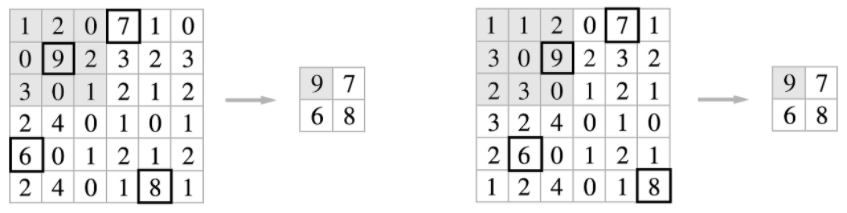

# 7.4 합성곱/풀링 계층 구현하기
합성곱 계층과 풀링 계층은 복잡해 보이지만, 사실 트릭을 사용하면 쉽게 구현 가능

이번 절에서는 그 트릭을 활용해 문제를 간단히 하면서 합성곱 계층을 구현

## 7.4.1 4차원 배열
CNN에서 계층 사이를 흐르는 데이터는 4차원이다.

데이터의 형상이 (10, 1, 28, 28)이라면, 이는 높이 28, 너비 28, 채널이 1개인 데이터가 10개라는 이야기

이를 파이썬으로 구현하면 다음과 같다.

In [8]:
import numpy as np

x = np.random.rand(10, 1, 28, 28) # 무작위로 데이터 생성
x.shape

(10, 1, 28, 28)

여기에서 (10개 중) 첫 번째 데이터에 접근하려면 단순히 x[0]이라고 쓴다.

마찬가지로 두 번째 데이터는 x[1] 위치에 있다.

In [9]:
print(x[0].shape)
print(x[1].shape)

(1, 28, 28)
(1, 28, 28)


또, 첫 번째 데이터의 첫 채널의 공간 데이터에 접근하려면 다음과 같이 적는다.

In [10]:
x[0, 0] # 또는 x[0][0]

array([[0.64022872, 0.9357743 , 0.30984185, 0.15723634, 0.46048615,
        0.23718398, 0.39636594, 0.36252278, 0.55335305, 0.44994666,
        0.48100639, 0.61247848, 0.03196735, 0.90682761, 0.80696627,
        0.51839514, 0.73519137, 0.14781286, 0.07394419, 0.4163133 ,
        0.93274664, 0.75040909, 0.53563623, 0.62146852, 0.09721429,
        0.50358788, 0.5302392 , 0.1272361 ],
       [0.34229754, 0.06815425, 0.58282001, 0.75614097, 0.85747655,
        0.98154646, 0.37665371, 0.98401032, 0.87715388, 0.39127899,
        0.60165306, 0.81748432, 0.3139009 , 0.21088624, 0.98845827,
        0.12159669, 0.1848499 , 0.45204689, 0.88422587, 0.03647762,
        0.26204122, 0.23365468, 0.4660833 , 0.02123599, 0.66100077,
        0.51886652, 0.4286049 , 0.95999645],
       [0.98412066, 0.05073717, 0.21197531, 0.12364793, 0.39362569,
        0.2158536 , 0.75031336, 0.82134578, 0.58990474, 0.97126266,
        0.49497935, 0.81478707, 0.07983463, 0.71736198, 0.93417499,
        0.29031395, 0.6144

이처럼 CNN은 4차원 데이터를 다룸

그래서 합성곱 연산의 구현은 복잡할 것 같지만, im2col이라는 트릭이 문제를 단순하게 만들어줌

## 7.4.2 im2col로 데이터 전개하기
CNN은 3차원의 데이터 (주로 이미지)를 학습시키는데 특화되어있는 신경망이다.

차원이 큰 데이터에 대해서도 정보를 잃지 않기 위해 합성곱을 사용하기 때문에 for문을 여러개를 사용해야 한다.

하지만 이런 식이라면 연산 속도가 매우 떨어질 것이다.

수만건의 데이터를 처리해야하는 CNN은 이러한 연산속도 저하 문제를 어떻게 해결할까?

그에 대한 해결이 im2col 함수이다.

im2col( Image to Column)은 입력 데이터를 필터링 (가중치 계산)하기 좋게 전개하는 함수

다음 그림과 같이 3차원 입력 데이터에 im2col을 적용하면 2차원 행렬로 바꿔줌

(정확히는 배치 안의 데이터 수 까지 포함한 4차원 데이터를 2차원으로 변환한다.)

![](./img/17.png)
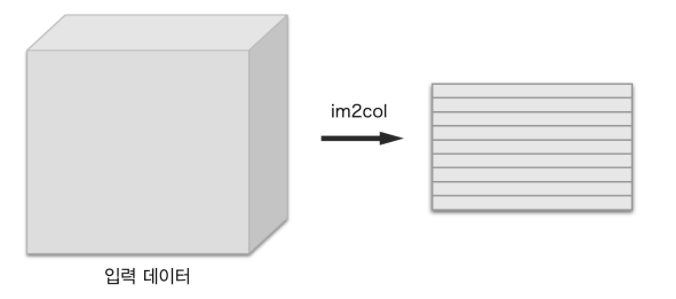

im2col은 필터링 좋게 입력 데이터를 전개

구체적으로는 다음 그림과 같이 입력 데이터에서 필터를 적용하는 영역(3차원 블록)을 한 줄로 늘어놓음

이 전개를 필터를 적용하는 모든 영역에서 수행하는 게 im2col

![](./img/18.png)
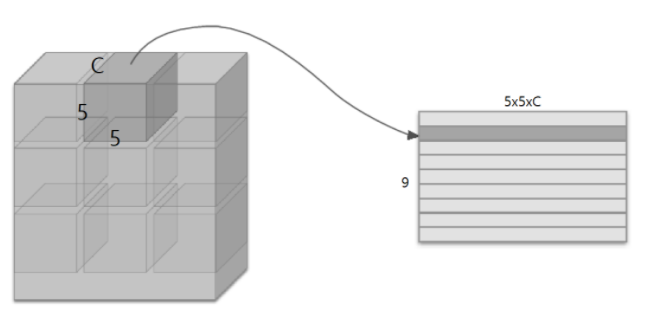

보기에 좋게끔 스트라이드를 크게 잡아 필터의 적용 영역이 겹치지 않도록 했지만,

실제 상황에서는 영역이 겹치는 경우가 대부분

필터 적용 영역이 겹치게 되면 im2col로 전개한 후의 원소 수가 원래 블록의 원소 수보다 많아짐

그래서 im2col을 사용해 구현하면 메모리를 더 많이 소비하는 단점

컴퓨터는 큰 행렬을 묶어서 계산하는 데 탁월

예를 들어 행렬 계산 라이브러리 등은 행렬 계산에 고도로 최적화되어 큰 행렬의 곱셈을 빠르게 계산할 수 있음

그래서 문제를 행렬 계산으로 만들면 선형 대수 라이브러리를 활용해 효율을 높일 수 있음

> im2col은 'image to column', 즉 '이미지에서 행렬로'라는 뜻이다. 카페와 체이너 등의 딥러닝 프레임워크는 im2col이라는 이름의 함수를 만들어 합성곱 계층을 구현할 때 이용하고 있다.

im2col로 입력 데이터를 전개한 다음에는 합성곱 계층의 필터(가중치)를 1열로 전개하고, 두 행렬의 곱을 계산하면 된다. 이는 완전연결 계층의 Affine 계층에서 한 것과 거의 같다.

![](./img/19.png)
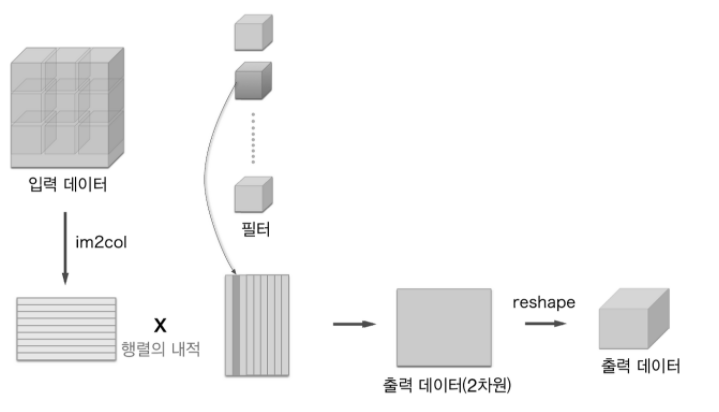

위 그림과 같이 im2col 방식으로 출력한 결과는 2차원 행렬

CNN은 데이터를 4차원 배열로 저장하므로 2차원인 출력 데이터를 4차원으로 변형

이상이 합성곱 계층의 구현 흐름

아래 변환 예시 블로그 참고
https://welcome-to-dewy-world.tistory.com/94

그런데 im2col과 완전연결신경망인 MLNN(Multi-Layer Neural Network)에서의 flatten은 정확히 무슨 차이가 있는걸까?

MLNN은 가중치를 갱신하면서 최적의 가중치를 찾아가며 신경망을 학습하고 이 때 입력 데이터의 모든 데이터가 사용된다. 따라서 초반에 2차원, 혹은 3차원의 입력 데이터를 flatten함으로써 모든 데이터가 신경망 전체를 아우르는 가중치의 학습 및 갱신에 사용된다고 볼 수 있다.

하지만 im2col은 결국 Conv층과 Pooling층의 연산 속도를 빠르게 하기 위해 사용하는 함수이고, 실질적으로 im2col을 사용한 후의 데이터는 Conv층의 합성곱을 수행하고 Pooling층의 기능을 한다. 또한 Conv층과 Pooling층은 각각의 filter를 갖고 있기 때문에 입력 데이터는 각각의 filter에 대해서만 영향을 받는다. 따라서 im2col과 flatten은 데이터를 압축시킨다는 역할은 같으나, im2col은 각 계층의 연산을 빠르게 해준다는 장점 이외의 데이터 변형, 또는 연산 변형은 전혀 없다.

결론적으로 CNN은 MLNN과 달리 데이터를 flatten시키지 않아 데이터 형상을 유지하면서 Conv계층, Pooling계층의 연산(내부적으로는 im2col을 사용하여 연산속도를 빠르게 함)을 사용하며 이미지 자체를 학습할 수 있다.

## 7.4.3 합성곱 계층 구현하기
im2col 함수의 인터페이스는 다음과 같다.  
```python
im2col(input_data, filter_h, filter_w, stride = 1, pad = 0)
```
- input_data : (데이터 수, 채널 수, 높이, 너비)의 4차원 배열로 이루어진 입력 데이터
- filter_h : 필터의 높이
- filter_w : 필터의 너비
- stride : 스트라이드
- pad : 패딩  

In [11]:
import sys, os
sys.path.append(os.pardir)
from common.util import im2col

x1 = np.random.rand(1, 3, 7, 7) # (데이터 수, 채널 수, 높이, 너비)
col1 = im2col(x1, 5, 5, stride=1, pad=0)
print(col1.shape)

x2 = np.random.rand(10, 3, 7, 7) # 데이터 10개
col2 = im2col(x2, 5, 5, stride = 1, pad = 0)
print(col2.shape)

(9, 75)
(90, 75)


여기에서는 두 가지 예를 보여주고 있다.

첫 번째는 배치 크기가 1, 채널은 3개, 높이, 너비가 7 X 7의 데이터

두 번째는 배치 크기만 10이고 나머지는 첫 번째와 동일

im2col 함수를 적용한 두 경우 모두 2번째 차원의 원소는 75개

이 값은 필터의 원소 수와 동일

배치 크기가 1일 때는 im2col의 결과의 크기가 (9, 75)이고, 10일 때는 그 10배인 (90, 75) 크기의 데이터가 저장

이처럼 im2col은 입력 데이터를 필터링(가중치 계산)하기 좋게 전개하는(펼치는) 함수

im2col을 사용하여 합성곱 계층 구현

In [12]:
class Convolution:
    def __init__(self, W, b, stride = 1, pad = 0):
        self.W = W
        self.b = b
        self.stride = strid
        self.pad = pad
        
    def forward(self, x):
        FN, C, FH, FW = self.W.shape
        N, C, H, W = x.shape
        out_h = int(1 + (H + 2*self.pad - FH) / self.stride)
        out_w = int(1 + (W + 2*self.pad - FW) / self.stride)
        
        col = im2col(x, FH, FW, self.stride, self.pad)
        col_W = self.W.reshape(FN, -1).T     # 필터 전개
        out = np.dot(col, col_W) + self.b
        
        out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)
        
        return out

합성곱 계층은 필터(가중치), 편향, 스트라이드, 패딩을 인수로 받아 초기화

필터는 (FN, C, FH, FW)의 4차원 형상

여기서 FN은 필터 갯수, C는 채널, FH는 필터 높이, FW는 필터 너비

```python
col = im2col(x, FH, FW, self.stride, self.pad)
col_W = self.W.reshape(FN, -1).T     # 필터 전개
out = np.dot(col, col_W) + self.b
```
이 부분에서 입력 데이터를 im2col로 전개하고 필터도 reshape를 사용해 2차원 배열로 전개

그리고 이렇게 전개한 두 행렬의 곱을 구함

필터를 전개하는 부분은 각 필터 블록을 1줄로 펼쳐 세움

이때 reshape의 두 번째 인수를 -1로 지정했는데, 이는 reshape이 제공하는 편의 기능

reshape에 -1을 지정하면 다차원 배열의 원소 수가 변환 후에도 똑같이 유지되도록 적절히 묶어줌

앞의 코드에서 (10, 3, 5, 5) 형상을 한 다차원 배열 W의 원소 수는 총 750이면 이 배열에 reshape(10, -1)을 호출했을 때 750개의 원소를 10묶음으로, 즉 형상이 (10, 75)인 배열로 만들어 줌

다음으로 forward 구현의 마지막에서는 출력 데이터를 적절한 형상으로 바꿔줌

이때 넘파이의 transpose 함수를 사용하는데, 이는 다차원 배열의 축 순서를 바꿔주는 함수

예를 들어 (10, 3, 5, 5) 형상의 배열을 transpose(0, 2, 3, 1)로 변환하면 (10, 5, 5, 3) 형상의 배열로 바뀜 (인덱스를 지정하여 축의 순서를 변경)

![](./img/20.png)

합성곱 계층의 역전파는 Affine 계층의 구현과 공통점이 많지만 한 가지 주의할 점은 im2col을 역으로 처리

col2im을 사용한다는 점을 제외하면 합성곱 계층의 역전파는 Affine 계층과 동일

## 7.4.4 풀링 계층 구현하기

풀링 계층 구현도 합성곱 계층과 마찬가지로 im2col을 사용해 입력 데이터를 전개

풀링의 경우엔 채널 쪽이 독립적이라는 점이 합성곱 계층 때와 다름

구체적으로는 다음 그림과 같이 풀링 적용 영역을 채널마다 독립적으로 전개

![](./img/21.png)
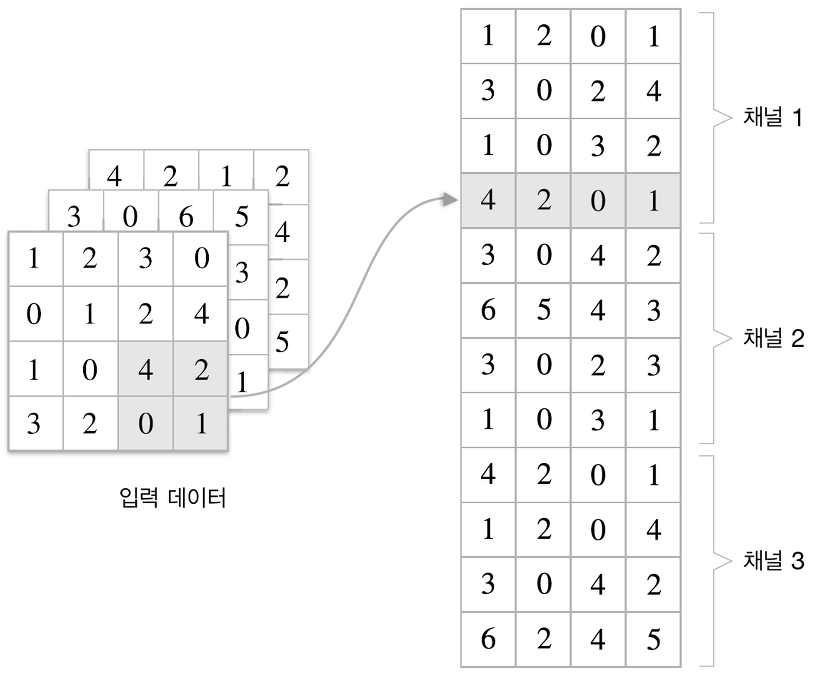

일단 이렇게 전개한 후, 전개한 행렬에서 행별 최댓값을 구하고 적절한 형상으로 성형

![](./img/22.png)
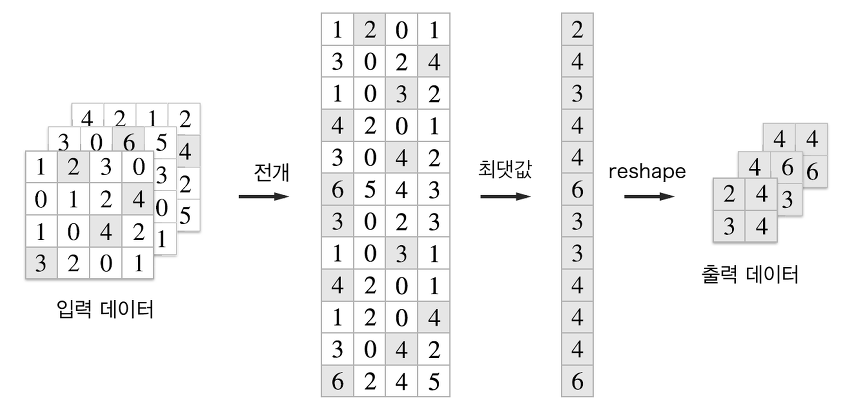

이상이 풀링 계층의 forward 처리 흐름이다. 다음은 이를 파이썬으로 구현한 코드이다.

In [13]:
class Pooling:
    def __init__(self, pool_h, pool_w, stride=1, pad=0):
        self.pool_h = pool_h
        self.pool_w = pool_w
        self.stride = stride
        self.pad = pad
    
    def forward(self, x):
        N, C, H, W = x.shape
        out_h = int(1 + (H - self.pool_h) / self.stride)
        out_w = int(1 + (W - self.pool_w) / self.stride)
        
        # 전개 (1)
        col = im2col(x, self.pool_h, self.pool_w, self.stride, self.pad)
        col = col.reshape(-1, self.pool_h * self.pool_w)
        
        # 최댓값 (2)
        out = np.max(col, axis = 1)

        # 성형 (3)
        out = out.reshape(N, out_h, out_w, C).transpose(0, 3, 1, 2)
        
        return out

풀링 계층 구현은 다음의 세 단계로 진행
1. 입력 데이터를 전개한다.
2. 행별 최댓값을 구한다.
3. 적절한 모양으로 성형한다. 

> 최댓값 계산에는 넘파이의 np.max 메서드를 사용할 수 있음
> np.max는 인수로 축(axis)을 지정할 수 있는데, 이 인수로 지정한 축마다 최댓값을 구할 수 있음
> 가령 np.max(x, axis=1)과 같이 쓰면 입력 x의 1번째 차원의 축마다 최댓값을 구함

이상이 풀링 계층의 forward 처리

입력 데이터를 풀링하기 쉬운 형태로 전개해버리면 그 후의 구현은 간단

# 7.5 CNN 구현하기

![](./img/23.png)
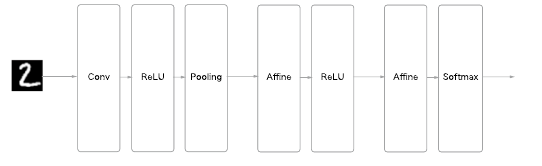

CNN의 네트워크는 'Convolution - ReLU - Pooling - Affine - ReLU - Affine - Softmax' 순으로 흐름.

In [14]:
import sys, os
sys.path.append(os.pardir)  
import pickle
import numpy as np
from collections import OrderedDict
from common.layers import *
from common.gradient import numerical_gradient


class SimpleConvNet:
    
    """단순한 합성곱 신경망
    
    conv - relu - pool - affine - relu - affine - softmax
    
    Parameters
    ----------
    input_size : 입력 크기（MNIST의 경우엔 784）
    hidden_size_list : 각 은닉층의 뉴런 수를 담은 리스트（e.g. [100, 100, 100]）
    output_size : 출력 크기（MNIST의 경우엔 10）
    activation : 활성화 함수 - 'relu' 혹은 'sigmoid'
    weight_init_std : 가중치의 표준편차 지정（e.g. 0.01）
        'relu'나 'he'로 지정하면 'He 초깃값'으로 설정
        'sigmoid'나 'xavier'로 지정하면 'Xavier 초깃값'으로 설정
    """
    
    def __init__(self, input_dim=(1, 28, 28), # input_dim : 입력 데이터(채널 수, 높이, 너비)의 차원
                 conv_param={'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1}, # conv_param : 합성곱 계층의 하이퍼파라미터(딕셔너리), # 딕셔너리키 : filter_num - 필터 수, filter_size - 필터 크기, pad - 패딩, stride - 스트라이드
                 hidden_size=100, output_size=10, weight_init_std=0.01): # hidden_size : 은닉층(완전연결)의 뉴런 수, output_size : 출력층(완전연결)의 뉴런 수, weight_init_std : 가중치 초기화 시 정규분포의 스케일(표준편차)
        filter_num = conv_param['filter_num']
        filter_size = conv_param['filter_size']
        filter_pad = conv_param['pad']
        filter_stride = conv_param['stride']
        input_size = input_dim[1]
        conv_output_size = (input_size - filter_size + 2*filter_pad) / filter_stride + 1
        pool_output_size = int(filter_num * (conv_output_size/2) * (conv_output_size/2))

        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * \
                            np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
        self.params['b1'] = np.zeros(filter_num)
        self.params['W2'] = weight_init_std * \
                            np.random.randn(pool_output_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = weight_init_std * \
                            np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(output_size)

        # 계층 생성
        # 순서가 있는 딕셔너리(OrderedDict)를 사용하여 계층을 차례로 추가
        self.layers = OrderedDict()
        self.layers['Conv1'] = Convolution(self.params['W1'], self.params['b1'],
                                           conv_param['stride'], conv_param['pad'])
        self.layers['Relu1'] = Relu()
        self.layers['Pool1'] = Pooling(pool_h=2, pool_w=2, stride=2)
        self.layers['Affine1'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W3'], self.params['b3'])

        self.last_layer = SoftmaxWithLoss()

    # 추론을 수행하는 predict 메서드
    # 초기화떄 생성한 순서가 있는 딕셔너리(OrderedDict)를 순서대로 호출하여 forward 메서드를 호출하며 그 결과를 다음 계층에 전달
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x
    
    # 손실 함수의 값을 구하는 loss 메서드
    # predict 메서드의 결과를 인수로 마지막 층의 forward 메서드를 호출하여 손실을 구함
    def loss(self, x, t):
        """손실 함수를 구한다.
        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블
        """
        y = self.predict(x)
        return self.last_layer.forward(y, t)
    

    def accuracy(self, x, t, batch_size=100):
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        acc = 0.0
        
        for i in range(int(x.shape[0] / batch_size)):
            tx = x[i*batch_size:(i+1)*batch_size]
            tt = t[i*batch_size:(i+1)*batch_size]
            y = self.predict(tx)
            y = np.argmax(y, axis=1)
            acc += np.sum(y == tt) 
        
        return acc / x.shape[0]
    

    def numerical_gradient(self, x, t):
        """기울기를 구한다（수치미분）.
        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블
        Returns
        -------
        각 층의 기울기를 담은 사전(dictionary) 변수
            grads['W1']、grads['W2']、... 각 층의 가중치
            grads['b1']、grads['b2']、... 각 층의 편향
        """
        loss_w = lambda w: self.loss(x, t)

        grads = {}
        for idx in (1, 2, 3):
            grads['W' + str(idx)] = numerical_gradient(loss_w, self.params['W' + str(idx)])
            grads['b' + str(idx)] = numerical_gradient(loss_w, self.params['b' + str(idx)])

        return grads
    

    def gradient(self, x, t):
        """기울기를 구한다(오차역전파법).
        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블
        Returns
        -------
        각 층의 기울기를 담은 사전(dictionary) 변수
            grads['W1']、grads['W2']、... 각 층의 가중치
            grads['b1']、grads['b2']、... 각 층의 편향
        """
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Conv1'].dW, self.layers['Conv1'].db
        grads['W2'], grads['b2'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W3'], grads['b3'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads
    
        
    def save_params(self, file_name="params.pkl"):
        params = {}
        for key, val in self.params.items():
            params[key] = val
        with open(file_name, 'wb') as f:
            pickle.dump(params, f)
            

    def load_params(self, file_name="params.pkl"):
        with open(file_name, 'rb') as f:
            params = pickle.load(f)
        for key, val in params.items():
            self.params[key] = val

        for i, key in enumerate(['Conv1', 'Affine1', 'Affine2']):
            self.layers[key].W = self.params['W' + str(i+1)]
            self.layers[key].b = self.params['b' + str(i+1)]

# 7.6 CNN 시각화하기

# 7.6.1 1번째 층의 가중치 시각화하기
MNIST 데이터셋으로 간단한 CNN 학습을 해보았을 때, 1번째 층의 합성곱 계층의 가중치는 그 형상이 (30, 1, 5, 5) - (필터 30개, 채널 1개, 5 X 5 크기)

필터의 크기가 5 X 5이고 채널이 1개라는 것은 이 필터를 1채널의 회색조 이미지로 시각화 가능

합성곱 계층 (1층째) 필터를 이미지화

![](./img/24.png)
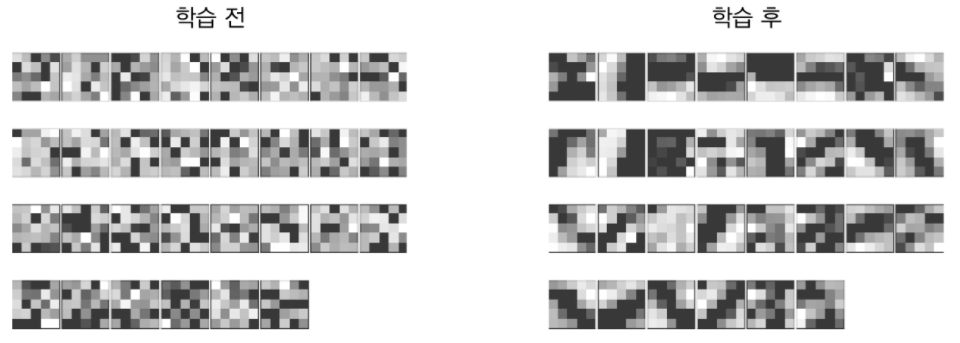

위 그림과 같이 학습 전 필터는 무작위로 초기화되고 있어 흑백의 정도에 규칙성이 없음

학습을 마친 필터는 규칙성 있는 이미지가 됨.

흰색에서 검은색으로 점차 변화하는 필터와 덩어리가 진 필터 등, 규칙을 띄는 필터로 바뀌었음을 알 수 있음.

그림에서 오른쪽같이 규칙성 있는 필터는 에지(색상이 바뀐 경계선)와 블롭(국소적으로 덩어리진 영역) 등을 보고 있음.

가령 왼쪽 절반이 흰색이고 오른쪽 절반이 검은색인 필터는 다음 그림과 같이 세로 방향의 에지에 반응하는 필터

![](./img/25.png)
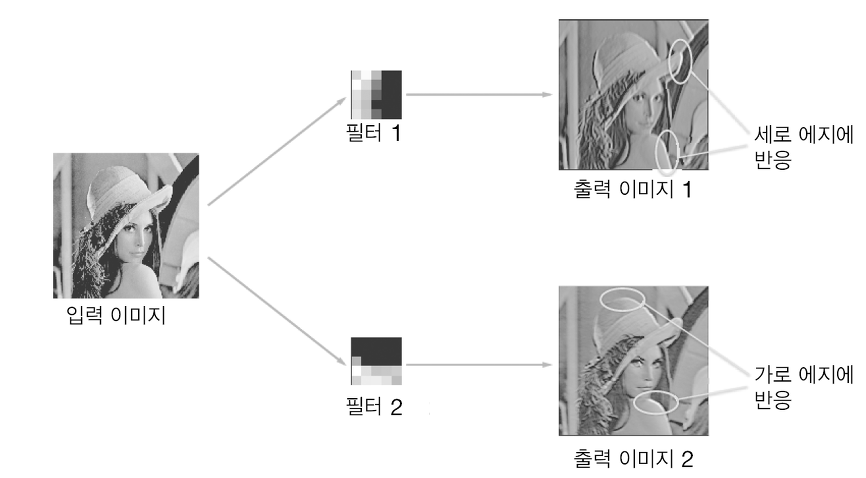

그림은 학습된 필터 2개를 선택하여 입력 이미지에 합성곱 처리를 한 결과로, '필터 1'은 세로 에지에 반응하며 '필터 2'는 가로 에지에 반응

합성곱 계층의 필터는 에지나 블롭 등의 원시적인 정보를 추출할 수 있으며 이런 원시적인 정보가 뒷단 계층에 전달된다는 것이 앞에서 구현한 CNN에서 일어나는 일

## 7.6.2 층 깊이에 따른 추출 정보 변화
겹겹이 쌓인 CNN에서는 계층이 깊어질수록 추출되는 정보 (정확히는 강하게 반응하는 뉴런)는 더 추상화된다는 것을 알 수 있음

다음 그림은 일반 사물 인식을 수행한 8층의 CNN

이 네트워크 구조는 AlexNet이라 하는데, 합성곱 계층과 풀링 계층을 여러 겹 쌓고, 마지막으로 완전연결 계층을 거쳐 결과를 출력하는 구조

그림에서 블록으로 나타낸 것은 중간 데이터이며, 그 중간 데이터에 합성곱 연산을 연속해서 적용

![](./img/26.png)
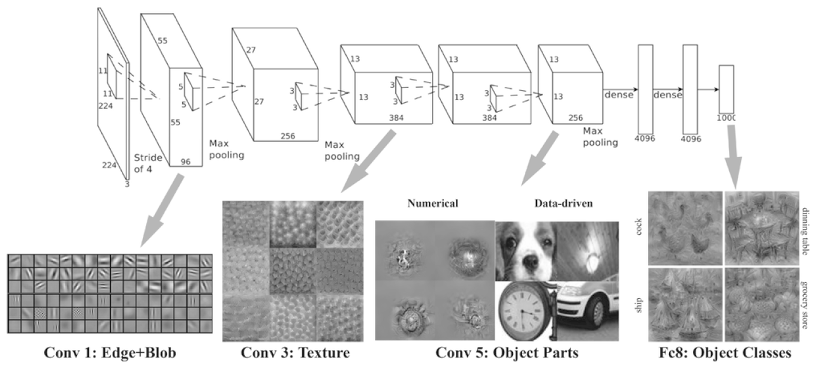

딥러닝의 흥미로운 점은 그림과 같이 합성곱 계층을 여러 겺 쌓으면, 층이 깊어지면서 더 복잡하고 추상화된 정보가 추출

처음 층은 단순한 에지에 반응하고, 이어서 텍스처에 반응하고, 더 복잡한 사물의 일부에 반응하도록 변화

즉, 층이 깊어지면서 뉴런이 반응하는 대상이 단순한 모양에서 '고급'정보로 변화

다시 말하면 사물의 '의미'를 이해하도록 변화

CNN (Convolutional Neural Network)에서 층의 깊이가 깊어질수록 추출되는 정보가 점차 변화합니다. 각 층에서 추출되는 정보는 다음과 같습니다.

1. **낮은 수준의 특징 (Low-level features):** 첫 번째 층에서는 작은 여러 필터들을 사용해 색상, 가장자리(edge), 그리고 질감(texture)과 같은 낮은 수준의 특징들을 추출합니다. 이 단계에서는 복잡한 구조의 특징을 파악하기 힘듭니다.

2. **중간 수준의 특징 (Mid-level features):** 층이 깊어지면, 필터는 더 넓은 receptive field를 갖게 되어, 여러 가장자리들이 합쳐져 조금 더 복잡한 패턴이 추출됩니다. 예를 들면, 원, 직선 및 곡선과 같이 간단한 기하학적 형상이 추출되며, 개체의 일부분을 파악하는데 도움이 됩니다.

3. **고수준의 특징 (High-level features):** 층이 더 깊어지면 합성곱 계층은 다양한 구조와 패턴을 합쳐 객체를 인식하거나 분류하기 위한 고수준의 특징을 추출합니다. 고수준 특징은 각 클래스에 고유한 정보를 포함하고 있어 분류기에서 가장 중요한 역할을 합니다.

결론적으로 층의 깊이가 깊어질수록, CNN은 점점 더 복잡하고 세분화된 정보를 추출하게 됩니다. 이렇게 연속적인 합성곱 계층을 통해 더 높은 수준의 특징들을 학습하게 되어 이미지 분류나 객체 인식 문제에 탁월한 성능을 발휘합니다.

# 7.7 대표적인 CNN
CNN의 원조인 LeNet, 딥러닝이 주목받도록 이끈 AlexNet

## 7.7.1 LeNet
**LeNet**은 손글씨 숫자를 인식하는 네트워크로, 1998년에 제안

그림과 같이 합성곱 계층과 풀링 계층을 반복하고, 마지막으로 완전연결 계층을 거치면서 결과를 출력

![](./img/27.png)
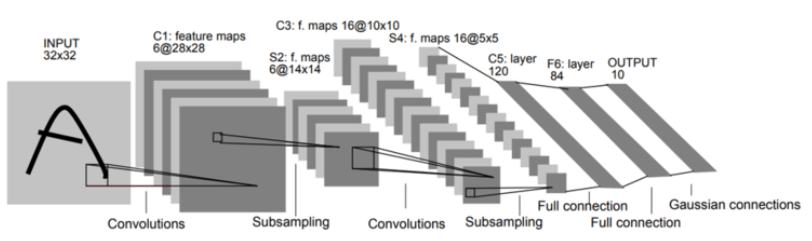

LeNet과 현재의 CNN을 비교하면 몇 가지 면에서 차이가 있다.

첫 번째 차이는 활성화 함수이다.

LeNet은 시그모이드 함수를 사용하는 데 반해, 현재는 주로 ReLU를 사용한다.

또, 원래의 LeNet은 서브샘플링을 하여 중간 데이터의 크기를 줄이지만 현재는 최대 풀링이 주류이다.

이처럼 LeNet과 현재의 CNN은 얼마간 차이가 있지만 큰 차이는 아니다.

## 7.7.2 AlexNet
2012년에 발표된 **AlexNet**은 딥러닝 열풍을 일으키는 데 큰 역할

다음 그림에서 보듯 그 구성은 기본적으로 LeNet과 크게 다르지 않다.

![](./img/28.png)
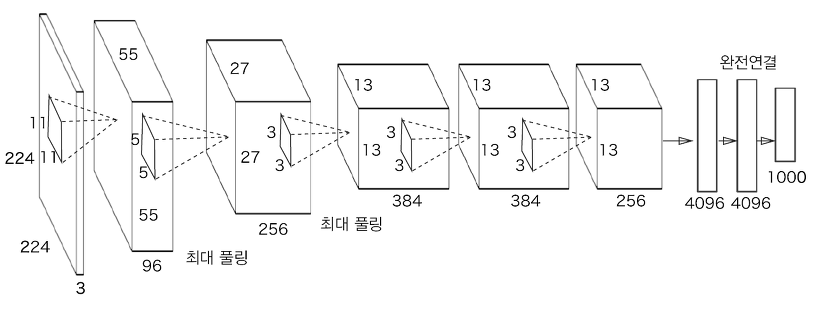

AlexNet은 합성곱 계층과 풀링 계층을 거듭하며 마지막으로 완전연결 계층을 거쳐 결과를 출력

LeNet에서 큰 구조는 바뀌지 않으나, AlexNet에서는 다음과 같은 변화를 주었다.

- 활성화 함수로 ReLU를 이용한다. 
- LRN(Local Response Normalization) 이라는 국소적 정규화를 실시하는 계층을 이용한다.
- 드롭아웃을 사용한다.

LeNet과 AlexNet은 두가지 다 데이터 분류를 위한 CNN (Convolutional Neural Network) 라는 점에서 공통되지만, 두 네트워크는 설계와 성능 면에서 몇 가지 차이점이 있습니다.

1. **LeNet-5:** 1998년에 Yann LeCun 등에 의해 개발된 LeNet은 최초의 CNN 모델 중 하나입니다. 이 모델은 손글씨 숫자 인식을 위한 구조로 주로 사용되며, 구조는 다음과 같습니다:
   - 합성곱 계층(Conv layers) 2개
   - 서브 샘플링 계층(Pooling layers) 2개
   - 완전 연결 계층(Fully Connected layers) 3개
LeNet은 비교적 작은 이미지(32x32)를 처리하는 데 효과적입니다.

2. **AlexNet:** 2012년에 Alex Krizhevsky 등이 개발한 AlexNet은 딥러닝의 발전에 큰 영향을 끼친 모델입니다. 이미지 인식 대회인 ILSVRC-2012에서 압도적인 성능을 보여주면서 딥러닝의 시대가 본격적으로 시작되었습니다. AlexNet의 구조는 다음과 같습니다:
   - 합성곱 계층(Conv layers) 5개
   - 최대 풀링 계층(Max Pooling layers) 3개
   - 완전 연결 계층(Fully Connected layers) 3개
   - 드롭아웃(Dropout layers) 2개
AlexNet은 응용 프로그램에서 더 큰 이미지(227x227)를 처리하는 데 더 효과적이며, 더욱 심화된 모델로 볼 수 있습니다.

**결론:** LeNet과 AlexNet은 두가지 모두 이미지 분류를 위한 CNN 아키텍처이지만, 성능 면에서 차이가 있습니다. AlexNet은 더 많은 계층과 더 큰 이미지 처리 능력을 가지고 있으며 딥러닝 분야에서 혁신적인 성공을 거두었습니다. 이 두 모델의 발전은 그 이후 신경망 아키텍처인 VGGNet, InceptionNet, ResNet 등의 등장으로 이어집니다.

LeNet과 AlexNet의 활성화 함수와 다른 특징에 대해 비교해드리겠습니다.

**LeNet:**
- 활성화 함수: 전형적으로 시그모이드 함수를 사용합니다.
- 정규화: 별도의 정규화 기법이 없습니다.
- 손실 함수: 일반적으로 교차 엔트로피 손실 함수를 사용합니다.
- 학습 알고리즘: 기본적인 역전파(Backpropagation) 알고리즘으로 학습합니다.

**AlexNet:**
- 활성화 함수: 렐루(ReLU, Rectified Linear Unit)를 사용합니다. 이로 인해 소멸하는 기울기 문제를 해결해 학습 속도가 향상됩니다.
- 정규화: 드롭아웃(Dropout)은 완전 연결 계층에서 과적합 방지를 위한 정규화 방법으로 사용됩니다. 학습 도중 무작위로 뉴런을 끄고(비활성화) 계산에서 제외시킴으로써 일시적으로 모델의 일부 연결을 끊습니다.
- 손실 함수: 교차 엔트로피 손실 함수에 가중치 감소(Weight Decay)를 추가해 정규화를 도입한 함수를 사용합니다.
- 학습 알고리즘: 확률적 경사하강법(Stochastic Gradient Descent, SGD)과 모멘텀으로 학습합니다. 또한 학습률(learning rate)이 주기적으로 감소하도록 조절하여 학습 과정이 개선됩니다.

**결론:** 기본적인 합성곱 신경망 구조에 더해, AlexNet은 ReLU 활성화 함수와 드롭아웃을 도입하여 학습의 속도와 성능을 향상시켰습니다. 또한, Weight Decay를 포함한 손실 함수와 학습률 스케쥴링 등의 기법을 사용해 학습 과정을 개선했습니다. 이러한 차이점들로 인해, AlexNet은 LeNet에 비해 복잡한 이미지 인식 문제에서 더 우수한 성능을 발휘합니다.

# 7.8 정리 
- CNN은 지금까지의 완전연결 계층 네트워크에 합성곱 계층과 풀링 계층을 새로 추가한다.
- 합성곱 계층과 풀링 계층은 im2col(이미지를 행렬로 전개하는 함수)을 이용하면 간단하고 효율적으로 구현할 수 있다.
- CNN을 시각화해보면 계층이 깊어질수록 고급 정보가 추출되는 모습을 확인할 수 있다.
- 대표적인 CNN에는 LeNet과 AlexNet이 있다.
- 딥러닝의 발전에는 빅데이터와 GPU가 크게 기여했다.